Question 1

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

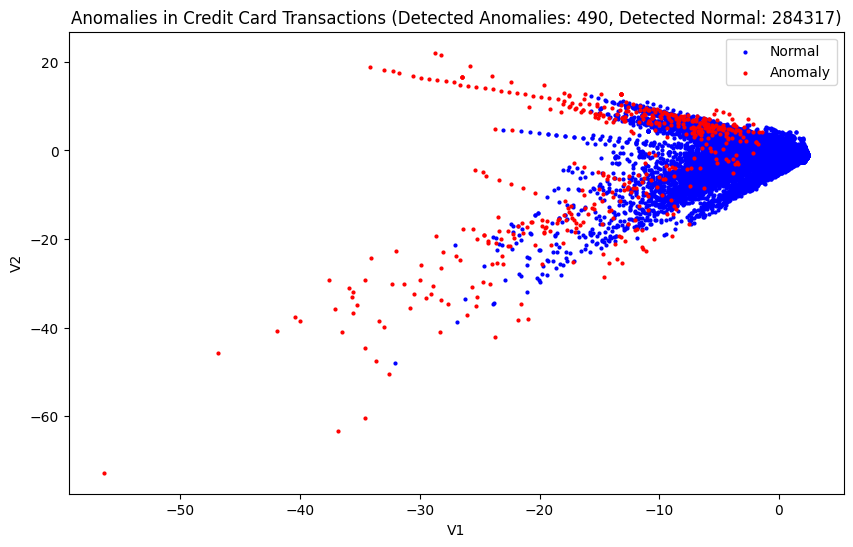

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

df = pd.read_csv('creditcard_for_fraud_detection.csv')

print(df.head())

iso_forest = IsolationForest(contamination=0.00172, random_state=42)

df['anomaly'] = iso_forest.fit_predict(df.drop(['Time', 'Class'], axis=1))

df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

print(df['anomaly'].value_counts())

normal_data = df[df['anomaly'] == 0]
anomaly_data = df[df['anomaly'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(normal_data['V1'], normal_data['V2'], c='blue', label='Normal', alpha=1, s=4)
plt.scatter(anomaly_data['V1'], anomaly_data['V2'], c='red', label='Anomaly', alpha=1, s=4)
plt.xlabel('V1')
plt.ylabel('V2')
plt.title(f'Anomalies in Credit Card Transactions (Detected Anomalies: {len(anomaly_data)}, Detected Normal: {len(normal_data)})')
plt.legend()
plt.show()


Question 2

   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    i

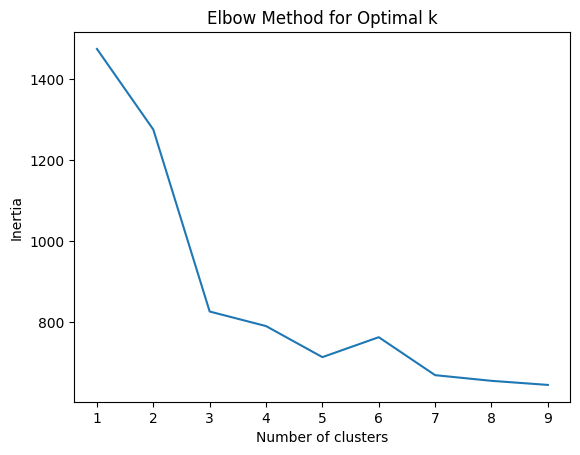

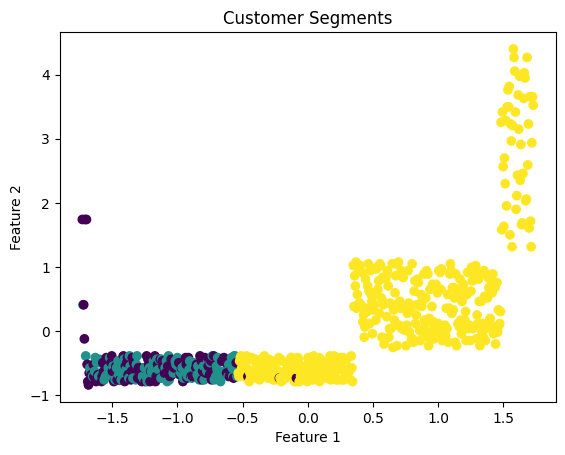

               feature   importance
3  Total_visits_online  5402.308382
1   Total_Credit_Cards  1507.605641
0                Sl_No   123.681917
5              Cluster  -601.662977
4     Total_calls_made -1100.588754
2    Total_visits_bank -4259.749593
R^2: 0.7588291261109379


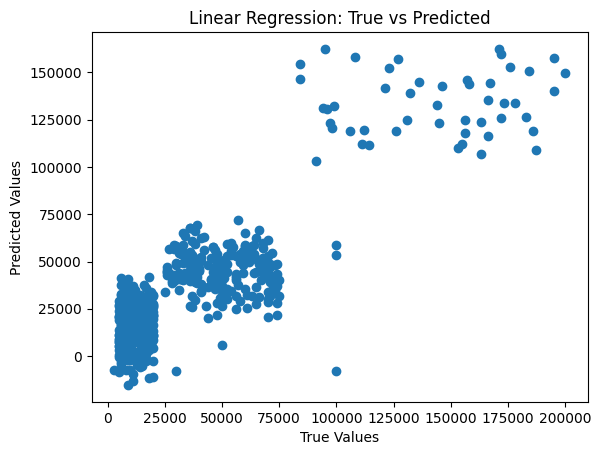

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

df_customer = pd.read_csv('Credit Card Customer Data.csv')

print(df_customer.head())
print(df_customer.info())

df_customer.fillna(df_customer.mean(), inplace=True)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_customer.drop('Customer Key', axis=1))

def k_means(data, k, max_iters=100):
    n, m = data.shape
    centroids = data[np.random.choice(n, k, replace=False)]
    for _ in range(max_iters):
        distances = np.array([np.linalg.norm(data - centroid, axis=1) for centroid in centroids])
        labels = np.argmin(distances, axis=0)
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

inertia = []
for k in range(1, 10):
    labels, centroids = k_means(df_scaled, k)
    inertia.append(np.sum(np.min(np.array([np.linalg.norm(df_scaled - centroid, axis=1) for centroid in centroids]), axis=0)))

plt.plot(range(1, 10), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

labels, centroids = k_means(df_scaled, 3)
df_customer['Cluster'] = labels

plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Customer Segments')
plt.show()

X = df_customer.drop(['Customer Key', 'Avg_Credit_Limit'], axis=1)
y = df_customer['Avg_Credit_Limit']
model = LinearRegression()
model.fit(X, y)

importance = model.coef_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importance})
print(feature_importance.sort_values(by='importance', ascending=False))

y_pred = model.predict(X)
print('R^2:', model.score(X, y))
plt.scatter(y, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: True vs Predicted')
plt.show()
